## Information Retrieval and NLP

Information Retrieval(IR) is not only an important part of text Data Mining but it also has an extensive application in Natural Language Processing(NLP). This is because every NLP pipiline implements text normalization as an important preprocessing step.

A few important definitions before we get started:

- A **word** is a string of characters that appears in a text/sentence/paragraph, etc. (We all know this one!)
- A **term** is a normalized word i.e. a word that has gone through preprocessing. For example: "studying"(A word) becomes "study"(A term after a certain kind of normalization).
- A **token** can be thought of a unique instance of a word or a term. For example, the set {'hannah','is','the','queen','of','the','Kingdom'} has 7 words but 6 tokens(because 'the' is repeated).
- Two words are of the same **type** if they fall under the same equivalence class or become the same term after normalization. For example, Studies, Study and Studying could be of the same type after performing some kind of normalization.


### Why perform normalization?
Because we want to retreieve all documents relevant to the user's query. For example, ff the user searches for "U.S.A" not only do we want all documents with that specific query, we may also want documents with "USA" and "United States of America" and "North America" and maybe even "the States"!

This notebook will walk you through some commonly used methods for text normalization and IR. We will be using te 'Disaster Tweets" dataset from Kaggle which can be found at: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

Enjoy!

In [29]:
# let's import necessary libraries

# nltk stands for Natural Language Tookit. this library is commonly used for text normalization
import nltk

# for arrays and dataframes
import numpy as np     
import pandas as pd    

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
# let's import the disaster tweets dataset from Kaggle

df_train = pd.read_csv('Data\\disaster_tweets_kaggle\\train.csv', index_col = False)
df_test = pd.read_csv('Data\\disaster_tweets_kaggle\\test.csv', index_col = False)

df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [32]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

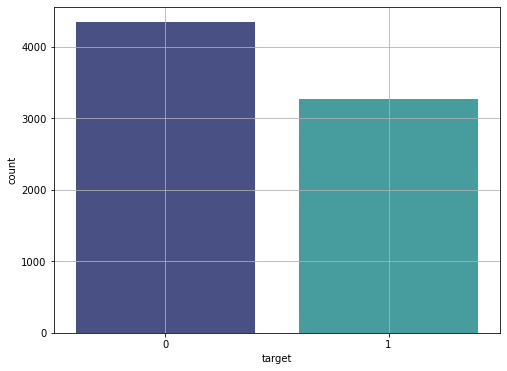

In [33]:
# let's look at distribution of the target variable
plt.figure(figsize = (8,6))
sns.countplot(data = df_train, x = 'target', palette = "mako")
plt.grid()

<AxesSubplot:>

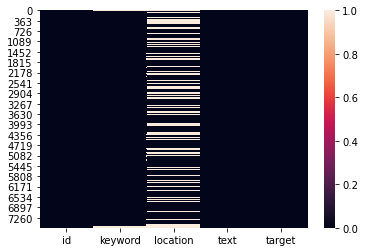

In [34]:
# let's visualize the missing values
plt.figure(figsize = (6,4))
sns.heatmap(df_train.isnull(), cmap = "rocket")

id             0
keyword       26
location    1105
text           0
dtype: int64


<AxesSubplot:>

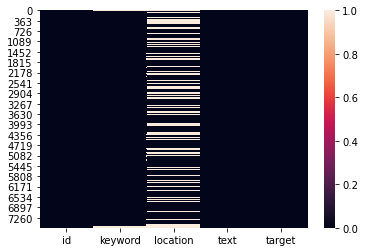

In [35]:
# let's check the test data
print(df_test.isnull().sum())
plt.figure(figsize = (6,4))
sns.heatmap(df_train.isnull(), cmap = "rocket")

In [36]:
# since there are too many missing valus for column 'location' we will drop this
df_train.drop(labels = ['location'], axis = 1, inplace = True)
df_test.drop(labels = ['location'], axis = 1, inplace = True)

In [37]:
# to deal with missing values in 'keyword' let's look at the mst common keywords
df_train.groupby('keyword').count().sort_values(by = 'target', ascending = False).head(20)

,id,text,target
keyword,,,
fatalities,45,45,45
deluge,42,42,42
armageddon,42,42,42
sinking,41,41,41
damage,41,41,41
harm,41,41,41
body%20bags,41,41,41
outbreak,40,40,40
evacuate,40,40,40


In [38]:
# save keywords as a list but we only want keywords that are not null
keywords_list = list((df_train[df_train['keyword'].isnull() == False]['keyword']).unique())

In [39]:
# check length to confirm only unique words are present
len(keywords_list)

221

In [40]:
'''
We can see that most keywords above are linked with disaster. Now let's take a look at the tweets with missing
keywords to see it we can extract them using this info.
'''
df_train[df_train['keyword'].isnull()]['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 61, dtype: object

In [41]:
# we will fill null values for 'keyword' based on the list of present keywords that was just created

def impute_keyword(df):
    keyword = df[0]
    text = df[1]
    
    if pd.isnull(keyword):            # if keyword === null
        for item in keywords_list:
            if item in text:          # of the tweet contains any keyword from the keyword list
                return item
    return keyword


In [42]:
df_train['keyword'] = df_train[['keyword', 'text']].apply(impute_keyword, axis = 1)
df_test['keyword'] = df_test[['keyword', 'text']].apply(impute_keyword, axis = 1)

In [43]:
# let's check if any null values were replaced
print("Train:", df_train['keyword'].isnull().sum())  
print("Test:", df_test['keyword'].isnull().sum())  

Train: 30
Test: 14


We cal see that more than half of the null values were replaced. However, this does not necessarily mean the remaining tweets did not contain any keywords. Let's look at the remaining tweets with null values.

In [44]:
df_train[df_train['keyword'].isnull()]['text']

10            Three people died from the heat wave so far
13                #Flood in Bago Myanmar #We arrived Bago
15                                         What's up man?
16                                          I love fruits
17                                       Summer is lovely
18                                      My car is so fast
19                           What a goooooooaaaaaal!!!!!!
20                                 this is ridiculous....
21                                      London is cool ;)
22                                            Love skiing
23                                  What a wonderful day!
24                                               LOOOOOOL
25                         No way...I can't eat that shit
26                                  Was in NYC last week!
27                                     Love my girlfriend
28                                              Cooool :)
29                                     Do you like pasta?
30            

13 contains '#Flood', 2587 contains 'Sirens' and 7599 contains '#Earthquake'. However, these were useful during imputation. Why?
Let's double check with our keyword list.

In [45]:
def check_keyword(value):
    if value in keywords_list:
        print(f"'{value}' is in the keyword list.")
    else:
        print(f"'{value}' is not the keyword list.")
        
check_keyword("#Flood")
check_keyword("flood")
check_keyword("#Earthquake")
check_keyword("earthquake")
check_keyword("Sirens")
check_keyword("sirens")

'#Flood' is not the keyword list.
'flood' is in the keyword list.
'#Earthquake' is not the keyword list.
'earthquake' is in the keyword list.
'Sirens' is not the keyword list.
'sirens' is in the keyword list.


As you can see, although #Flood, Sirens and #Earthquake are not present in the keywords list, flood, sirens and eathquake are! We just need to do some normalzation to deal with these.

## Common techniques for text data normalization

#### 1. Tokelization
This is the process of converting a text/sentence or a string od characters into a list of words/tokens. We will also use delimiters to remove "#", quolations, etc.

#### 2. Case Folding
Reducing all letters to upper/lower case.

#### 3. Removing Stop Words
Stop words are common words like 'the','in','on','at', etc. which generally have little value when it comes to IR. However, these are found to be useful in finding patterns or meaning during deep learning.

#### 4. Lemmatization
Reducing a word/token into it's dictionary headword form i.e. lemma. For example: cars, car's -> car; cutting -> cut; etc.

#### 5. Stemming
Cutting off words at the end to acheive "principled" lemmatization. It si a faster way of acheiving lemmatization and does not depend on context. However, it may not always give sensible results in some cases. Exampe: reduction -> reduc (stemming) but reduction -> reduce (lemmatization)

**To replace the remaining null values in the 'Keyword' column we will only use tokenization, case folding and stop word removal for now.**

In [46]:
import string     # to remove punctions
from nltk.corpus import stopwords     # to remove stopwords

def normalize(text, stopword_removal):
    
    # first create a list of characters without punctuation
    char_list = [ch for ch in text if ch not in string.punctuation]
    
    # join to re create a text without punctuation
    text = ''.join(char_list)
    
    # case folding
    lower_cased_text = text.casefold()
    
    if stopword_removal == 1:
        # tokenize and remove stopwords
        word_list = [word for word in lower_cased_text.split() if word not in stopwords.words('english')]
    else:
        word_list = [word for word in lower_cased_text.split()]
    
    return word_list


In [47]:
#let's test it
normalize(df_train['text'][1], 1)

['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']

In [48]:
# now let's use this to replace the remaining null values if possible

# this function uses normalization to find keywords from the tweet
def smart_impute_keyword(df):
    keyword = df[0]
    text = df[1]
    
    if pd.isnull(keyword):            # if keyword === null
        normalized_text_list = normalize(text, 1)
        for item in normalized_text_list:
            if item in keywords_list:         
                return item
        return "none"
    return keyword

In [49]:
df_train['keyword'] = df_train[['keyword', 'text']].apply(smart_impute_keyword, axis = 1)
df_test['keyword'] = df_test[['keyword', 'text']].apply(smart_impute_keyword, axis = 1)

In [50]:
# let's check if any null values were replaced
print("Train:", df_train['keyword'].isnull().sum())  
print("Test:", df_test['keyword'].isnull().sum())

Train: 0
Test: 0


### Feature Engineering

In [53]:
# Add length of the tweet as new attribute

df_train['length'] = df_train['text'].apply(lambda x: len(x))
df_train.head()

,id,keyword,text,target,length
0,1,earthquake,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,fire,Forest fire near La Ronge Sask. Canada,1,38
2,5,evacuation,All residents asked to 'shelter in place' are ...,1,133
3,6,evacuation,"13,000 people receive #wildfires evacuation or...",1,65
4,7,fire,Just got sent this photo from Ruby #Alaska as ...,1,88


In [54]:
# repeat with text data

df_test['length'] = df_test['text'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Disaster tweet')

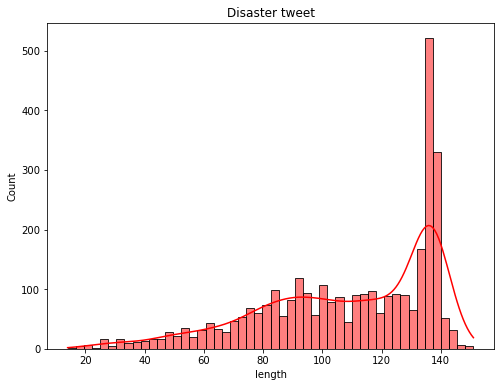

In [77]:
# check target variable distribution with respect to length
plt.figure(figsize = (8,6))
sns.histplot(df_train[df_train['target'] == 1]['length'], bins = 50, kde = True, color = 'red')
plt.title("Disaster tweet")

Text(0.5, 1.0, 'Non-disaster tweet')

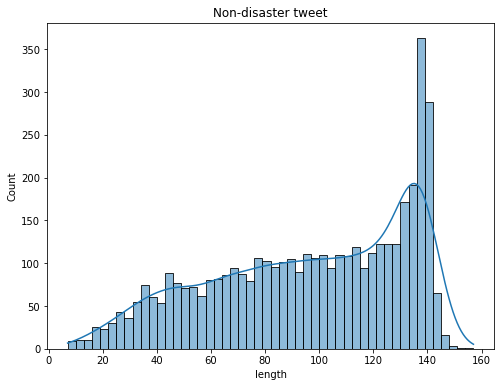

In [78]:
plt.figure(figsize = (8,6))
sns.histplot(df_train[df_train['target'] == 0]['length'], bins = 50, kde = True)
plt.title("Non-disaster tweet")